# Lab 3b: Comparación de algoritmos de optimización.

Lab demostrativo de comparación de algoritmos de optimización.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FCEIA-AAII/lab3/blob/main/lab3b.ipynb)

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [1]:
import os

REPO_NAME = "lab3"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)



Importar librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

2024-03-25 10:48:45.190717: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Establecer GPU por defecto en caso de estar disponible.

In [3]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

## Análisis Exploratorio.

Cargar y visualizar los datos.

Ejemplos de entrenamiento: (60000, 28, 28)
Ejemplos de test: (10000, 28, 28)


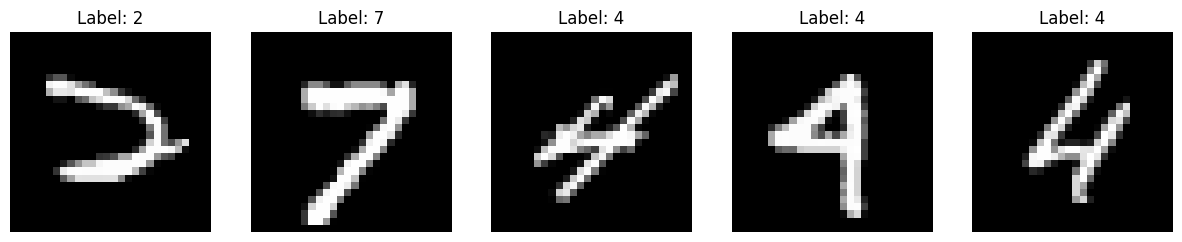

In [4]:
# Cargamos MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizamos los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

print("Ejemplos de entrenamiento:", X_train.shape)
print("Ejemplos de test:", X_test.shape)

# Mostramos algunos ejemplos al azar:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    idx = np.random.randint(0, X_train.shape[0])
    axs[i].imshow(X_train[idx], cmap='gray')
    axs[i].set_title(f"Label: {y_train[idx]}")
    axs[i].axis('off')
plt.show()

## Entrenamiento

Definimos nuestro modelo usando tensorflow.

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Entrenamos el modelo utilizando distintos optimizadores.

In [6]:
optimizers = ['sgd', 'rmsprop', 'adam']
histories = []

for optimizer in optimizers:
    print(f"Entrenando modelo con optimizador: {optimizer}")
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
    histories.append(history)

Entrenando modelo con optimizador: sgd
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6334 - accuracy: 0.8422 - val_loss: 0.3536 - val_accuracy: 0.9035
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3353 - accuracy: 0.9059 - val_loss: 0.2918 - val_accuracy: 0.9193
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2879 - accuracy: 0.9191 - val_loss: 0.2607 - val_accuracy: 0.9278
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2577 - accuracy: 0.9273 - val_loss: 0.2371 - val_accuracy: 0.9321
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2352 - accuracy: 0.9341 - val_loss: 0.2199 - val_accuracy: 0.9374
Entrenando modelo con optimizador: rmsprop
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1774 - accuracy: 0.9479 - val_loss: 0.1290 - val_accuracy: 0.9603
Epoch 2/5
1875/1875 [==============================] - 3s 1m

Plot del historial de métricas.

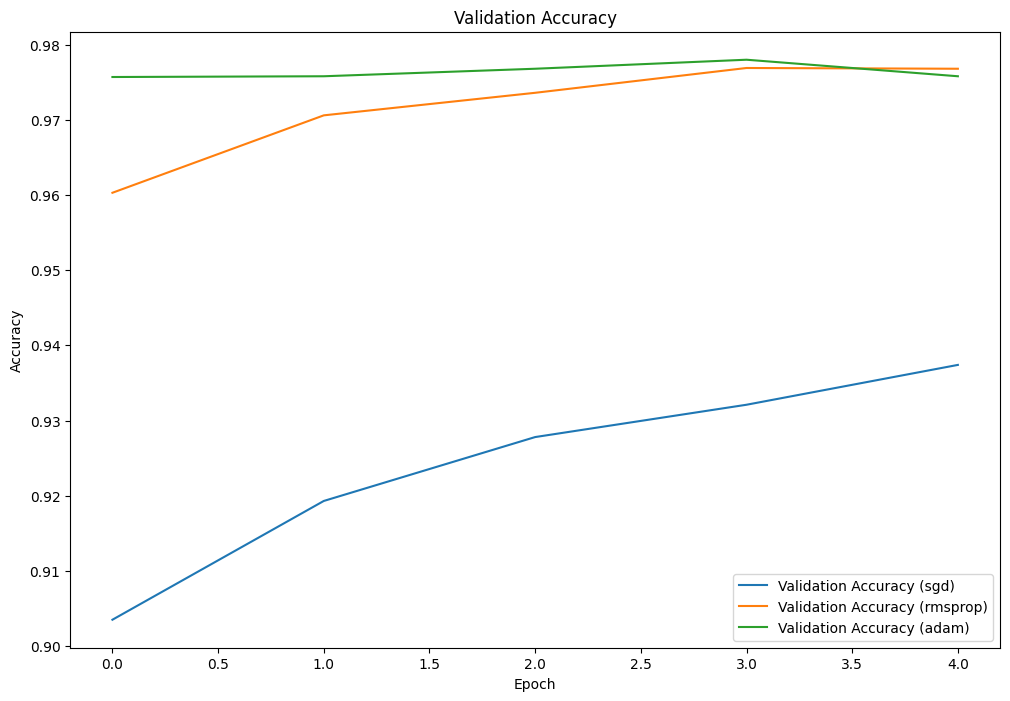

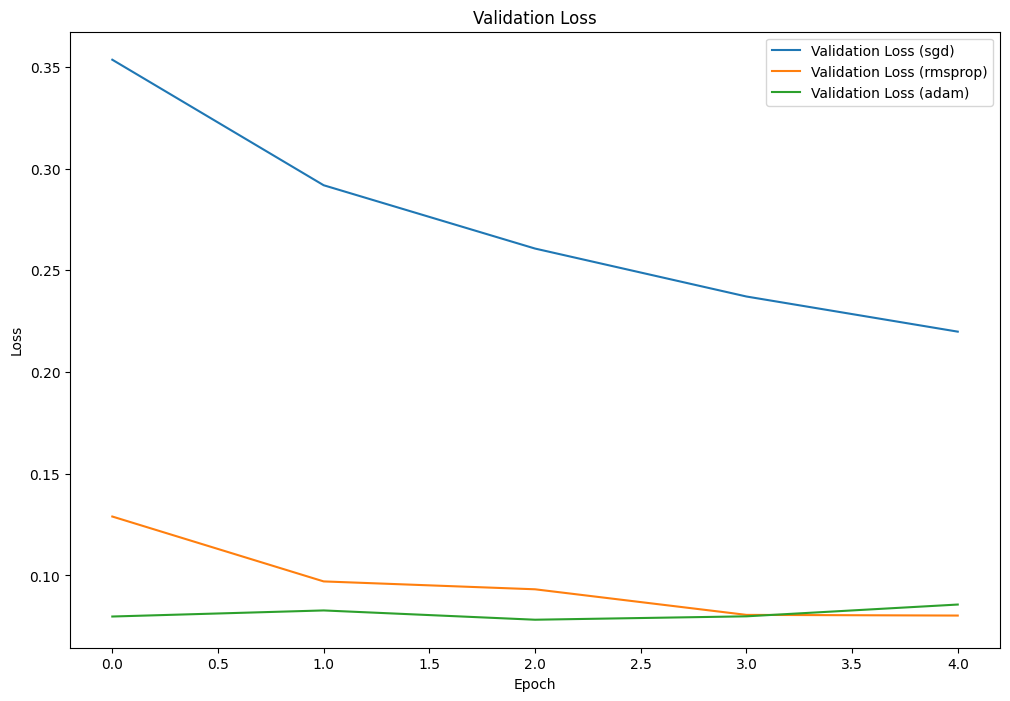

In [7]:
# Accuracy
plt.figure(figsize=(12, 8))

for i, history in enumerate(histories):
    optimizer = optimizers[i]
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({optimizer})')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Loss
plt.figure(figsize=(12, 8))

for i, history in enumerate(histories):
    optimizer = optimizers[i]
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({optimizer})')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
